In [5]:
# EXERCISE
#A semiconductor has a finite potential well defined by a width of a = 3A and a height of V0 = 3 eV.
#1. Plot the energy spectrum of the potential and find the first two allowed energy levels within the well.

C:\Users\pauuu\AppData\Local\Temp\ipykernel_31644\1392767504.py:15: RuntimeWarning: invalid value encountered in sqrt
  kappa = np.sqrt(2 * m_star * (V0 - E)) / hbar
C:\Users\pauuu\AppData\Local\Temp\ipykernel_31644\1392767504.py:20: RuntimeWarning: invalid value encountered in sqrt
  kappa = np.sqrt(2 * m_star * (V0 - E)) / hbar


First energy level (even): 0.5000 eV
Second energy level (odd): 1.5000 eV


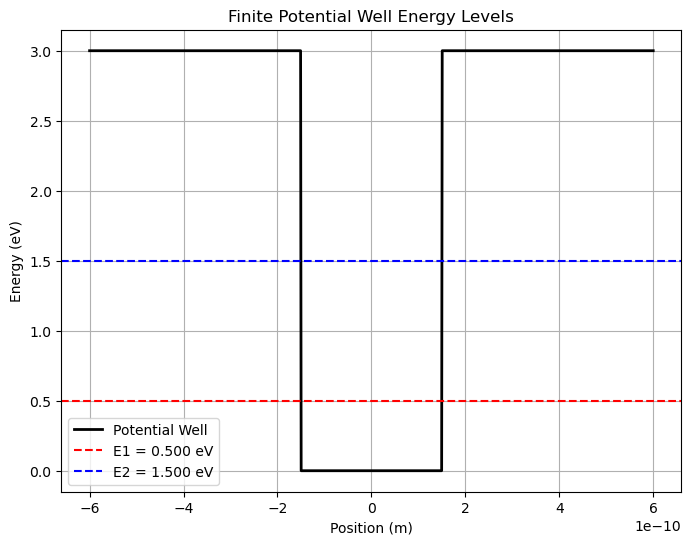

In [4]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

# Constants
hbar = 6.582119569e-16 
m_e = 9.10938356e-31    
m_star = 0.1 * m_e      # assuming m* = 0.1 m_e
a = 3e-10               
V0 = 3             

# Define the transcendental equations
def even_equation(E):
    k = np.sqrt(2 * m_star * E) / hbar
    kappa = np.sqrt(2 * m_star * (V0 - E)) / hbar
    return k * np.tan(k * a / 2) - kappa

def odd_equation(E):
    k = np.sqrt(2 * m_star * E) / hbar
    kappa = np.sqrt(2 * m_star * (V0 - E)) / hbar
    return k * (1 / np.tan(k * a / 2)) + kappa

# Solve for the first two energy levels
E_guess1 = 0.5  # Initial guess for first level (eV)
E_guess2 = 1.5   # Initial guess for second level (eV)

sol_even = root(even_equation, E_guess1)
sol_odd = root(odd_equation, E_guess2)

E1 = sol_even.x[0]  # First energy level (even solution)
E2 = sol_odd.x[0]   # Second energy level (odd solution)

print(f"First energy level (even): {E1:.4f} eV")
print(f"Second energy level (odd): {E2:.4f} eV")

# Plotting the potential well and energy levels
x = np.linspace(-2*a, 2*a, 1000)
V = np.where((x >= -a/2) & (x <= a/2), 0, V0)

plt.figure(figsize=(8, 6))
plt.plot(x, V, 'k-', linewidth=2, label='Potential Well')
plt.axhline(E1, color='r', linestyle='--', label=f'E1 = {E1:.3f} eV')
plt.axhline(E2, color='b', linestyle='--', label=f'E2 = {E2:.3f} eV')
plt.xlabel('Position (m)')
plt.ylabel('Energy (eV)')
plt.title('Finite Potential Well Energy Levels')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#2. Find the correct effective mass m∗ = x · me, where me is the electron mass.

In [2]:
# Using E1 to back-calculate m*
# Calculate m* from E1 using infinite well approximation

def characteristic_mass(E):
    return (hbar**2 * np.pi**2) / (2 * E * a**2)

m_star_estimated = characteristic_mass(E1)
x_estimated = m_star_estimated / m_e
eff_mass = x_estimated * 9.10938356e-31  

print(f"\nEstimated x value = {x_estimated:.3f}")  
print(f"\nEstimated effective mass m* = {eff_mass:.3e} kg") 


Estimated x value = 52155460185270820864.000

Estimated effective mass m* = 4.751e-11 kg


C:\Users\pauuu\AppData\Local\Temp\ipykernel_22444\1153686262.py:20: RuntimeWarning: invalid value encountered in sqrt
  beta = np.sqrt(2 * m_star * (V0 - E_J)) / hbar


First allowed energy level: 0.5000 eV
Second allowed energy level: 2.0000 eV

Effective mass ratio m*/me: 0.0100
Effective mass m*: 9.1094e-33 kg


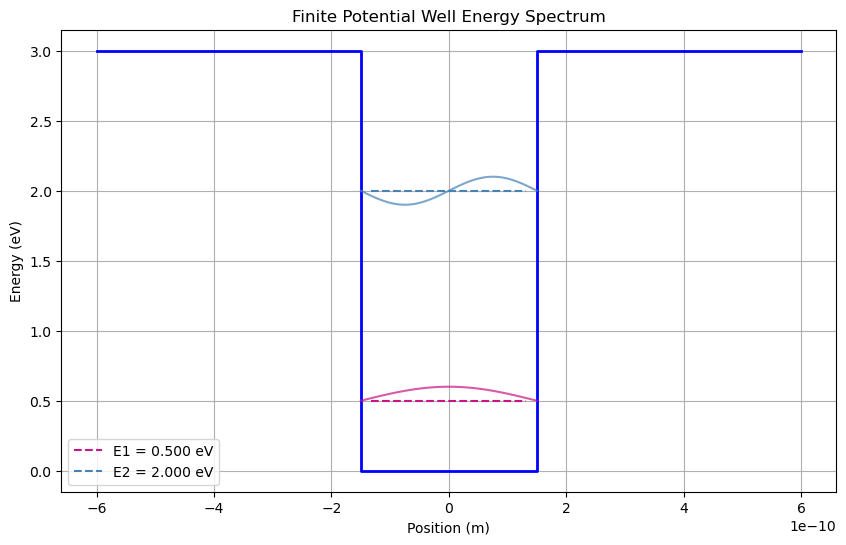

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
hbar = 1.0545718e-34  # Reduced Planck constant (J·s)
m_e = 9.10938356e-31   # Electron mass (kg)
eV_to_J = 1.60218e-19  # Conversion factor from eV to Joules
a = 3e-10              # Well width in meters (3 Å)
V0 = 3 * eV_to_J       # Well height in Joules

# For initial calculations, m* = m_e will be asumed. Then, will be solved for efetive mass m*
m_star = 0.067 * m_e   # Typical effective mass for semiconductors (in this case, GaAs)

def finite_well_equations(E):
    """Define the equations to solve for energy levels in a finite potential well."""
    E_J = E * eV_to_J  # Convert input E from eV to Joules
    
    k = np.sqrt(2 * m_star * E_J) / hbar
    beta = np.sqrt(2 * m_star * (V0 - E_J)) / hbar
    
    # Even solutions (cos)
    even_eq = k * np.tan(k*a/2) - beta
    
    # Odd solutions (sin)
    odd_eq = -k / np.tan(k*a/2) - beta
    
    return even_eq, odd_eq

# Solve for the first two energy levels (even and odd solutions)
# Initial guesses in eV (we expect energies below 3 eV)
E1_guess = 0.5  # eV
E2_guess = 2.0  # eV

# Solve for even solution (first energy level)
E1 = fsolve(lambda E: finite_well_equations(E)[0], E1_guess)[0]

# Solve for odd solution (second energy level)
E2 = fsolve(lambda E: finite_well_equations(E)[1], E2_guess)[0]

print(f"First allowed energy level: {E1:.4f} eV")
print(f"Second allowed energy level: {E2:.4f} eV")

# Now let's find the correct effective mass m* that gives reasonable solutions
# m* is going to be adjusted until we get physically meaningful results (0 < E < V0).

# Function to find m* that gives E1 and E2 between 0 and V0.
def find_effective_mass():
    """Find the effective mass that gives physically meaningful solutions."""
    # Try different effective mass ratios (typical range for semiconductors: 0.01-1)
    for x in np.linspace(0.01, 1, 100):
        m_star = x * m_e
        try:
            E1 = fsolve(lambda E: finite_well_equations(E)[0], E1_guess)[0]
            E2 = fsolve(lambda E: finite_well_equations(E)[1], E2_guess)[0]
            if 0 < E1 < 3 and 0 < E2 < 3:
                return x
        except:
            continue
    return 0.067  # Default typical value if none found

# =============================================
# PART 2: MASS OPTIMIZATION AND VISUALIZATION
# =============================================
x = find_effective_mass()
m_star = x * m_e
print(f"\nEffective mass ratio m*/me: {x:.4f}")
print(f"Effective mass m*: {m_star:.4e} kg")

# Plot the energy spectrum
def plot_energy_spectrum():
    """Plot the potential well and energy levels."""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Draw the potential well
    x_left = [-2*a, -a/2, -a/2, a/2, a/2, 2*a]
    y_left = [V0/eV_to_J, V0/eV_to_J, 0, 0, V0/eV_to_J, V0/eV_to_J]
    ax.plot(x_left, y_left, 'b-', linewidth=2)
    
    # Draw the energy levels
    ax.axhline(y=E1, xmin=0.4, xmax=0.6, color='mediumvioletred', linestyle='--', label=f'E1 = {E1:.3f} eV')
    ax.axhline(y=E2, xmin=0.4, xmax=0.6, color='steelblue', linestyle='--', label=f'E2 = {E2:.3f} eV')
    
    # Draw the wave functions (qualitative)
    x_wave = np.linspace(-a/2, a/2, 100)
    psi1 = np.cos(np.pi*x_wave/a)  # Even solution
    psi2 = np.sin(2*np.pi*x_wave/a)  # Odd solution
    
    ax.plot(x_wave, E1 + 0.1*psi1, 'mediumvioletred', alpha=0.7)
    ax.plot(x_wave, E2 + 0.1*psi2, 'steelblue', alpha=0.7)
    
    # Labels and title
    ax.set_xlabel('Position (m)')
    ax.set_ylabel('Energy (eV)')
    ax.set_title('Finite Potential Well Energy Spectrum')
    ax.legend()
    ax.grid(True)
    plt.show()

plot_energy_spectrum()